In [1]:
#Import preliminary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Review the data
data = pd.read_csv('datasets/diabetes_prediction_dataset.csv')

data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [2]:
#Check data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [3]:
#Check for missing values
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [4]:
# Separate features and labels
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
features = data[data.columns[:-1]]
label = 'diabetes'

X, y = features, data[label]

# Split the data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)

print(f"Training cases: {X_train.shape[0]}\nTest cases: {X_test.shape[0]}")


Training cases: 70000
Test cases: 30000


Confusion Matrix:
 [[27195   266]
 [  935  1604]] 

Accuracy: 0.9599666666666666
Overall Precision: 0.8577540106951872
Overall Recall: 0.6317447814100039
AUC: 0.9585591963935132


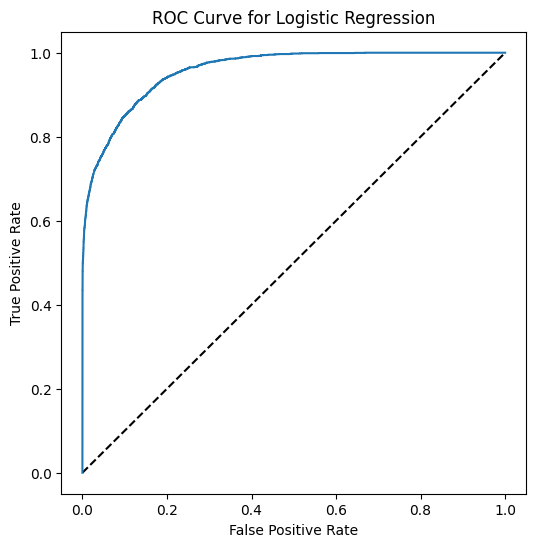

Confusion Matrix:
 [[27372    89]
 [  821  1718]] 

Accuracy: 0.9696666666666667
Overall Precision: 0.9507470946319867
Overall Recall: 0.6766443481685703
AUC: 0.9566325426761908


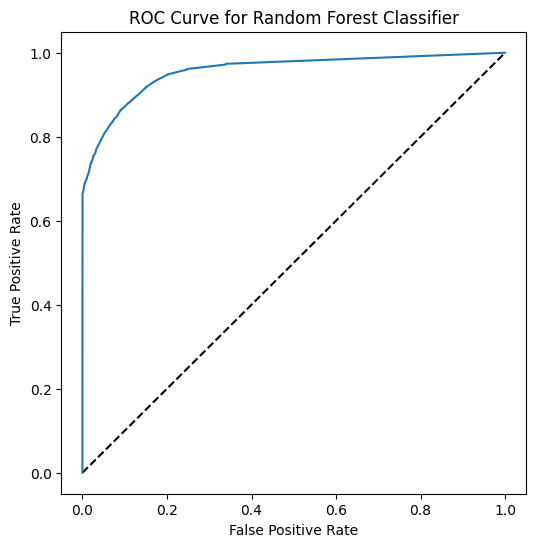

In [7]:
# Train the model
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble  import RandomForestClassifier
from sklearn.metrics import classification_report,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score

# Set regularization rate
reg = 0.01

# Define preprocessing for numeric columns (normalize them so that they are on the same scale)
numerical_features = [col for col in features if features[col].dtype in ['int64','float64']]

num_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Define preprocessing for categorical features
categorical_features = [col for col in features if features[col].dtype in ['object']]

cat_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num',num_transformer,numerical_features),
        ('cat',cat_transformer,categorical_features)])

models = {'Logistic Regression': LogisticRegression(C=1/reg, solver="liblinear"),
          'Random Forest Classifier': RandomForestClassifier(n_estimators=100)}


for name, model in models.items():
    # Create preprocessing and training pipeline
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model',model)])
    
    # Train the model
    best_model = pipeline.fit(X_train, y_train)
    
    # Get predictions from test data
    predictions = best_model.predict(X_test)
    y_scores = best_model.predict_proba(X_test)

    # Get evaluation metrics
    cm  = confusion_matrix(y_test, predictions)
    print ('Confusion Matrix:\n',cm, '\n')
    print('Accuracy:', accuracy_score(y_test, predictions))
    print("Overall Precision:",precision_score(y_test, predictions))
    print("Overall Recall:",recall_score(y_test, predictions))
    auc = roc_auc_score(y_test,y_scores[:,1])
    print('AUC: ' + str(auc))

    # calculate ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

    # plot ROC curve
    fig = plt.figure(figsize=(6, 6))
    # Plot the diagonal 50% line
    plt.plot([0, 1], [0, 1], 'k--')
    # Plot the FPR and TPR achieved by our model
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f"ROC Curve for {name}")
    plt.show()


0        0
1        0
2        0
3        0
4        0
        ..
99995    0
99996    0
99997    0
99998    0
99999    0
Name: diabetes, Length: 100000, dtype: int64
